In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import mygraph as mg
%matplotlib inline

In [5]:
df = pd.read_csv('lamp.csv', sep='\t')
print( df.head() )
W = df['V'] * df['I']

   t_pir, C     V      I  T_pir, K  T, K
0       900  1.48  0.625      1173  1223
1      1000  1.58  0.680      1273  1323
2      1100  1.64  0.735      1373  1423
3      1200  1.68  0.823      1473  1523
4      1300  1.71  0.917      1573  1623


Коэффиценты прямой: k, s_k, b, s_b
2.2957, 0.15206, -15.793, 0.027382


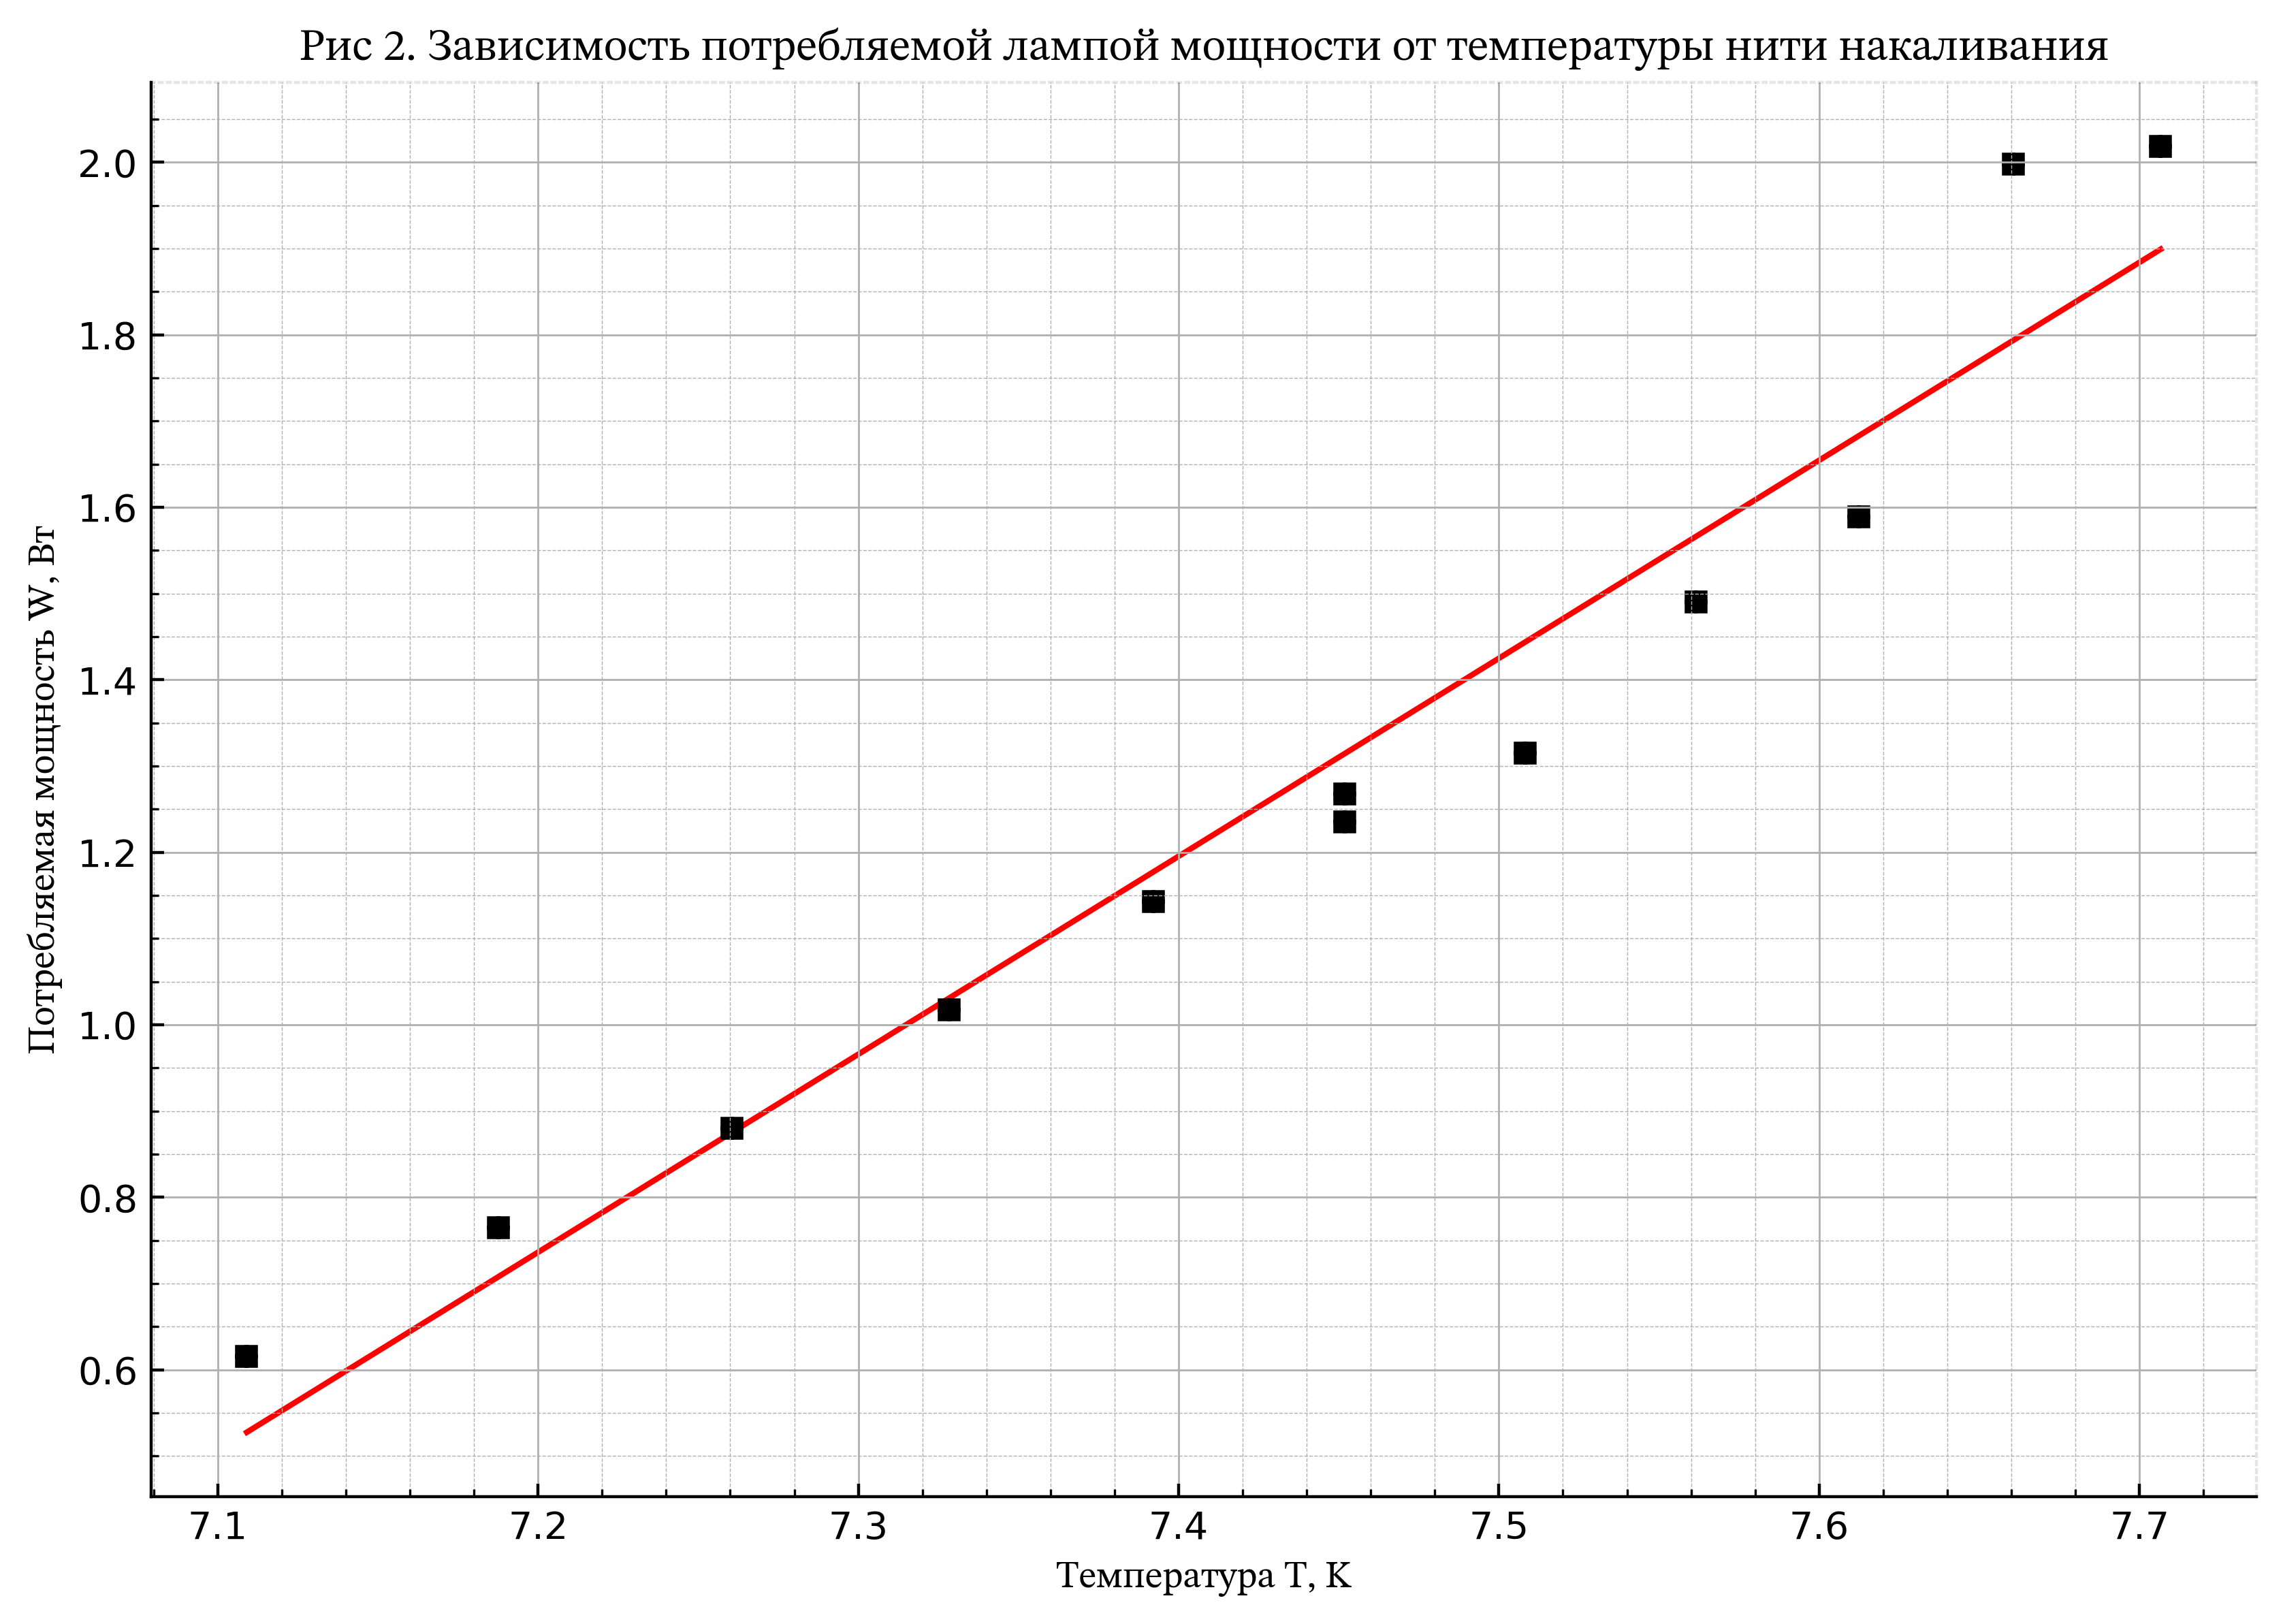

In [6]:
X = np.log( np.array( df['T, K'] ) ) # C -> K 
Y = np.log( np.array( W ) ) # W

fig = mg.make_figure(dpi_mode='high')
ax = fig.add_subplot()
mg.set_grids(fig)
mg.set_title(ax, 'Зависимость потребляемой лампой мощности от температуры нити накаливания')
mg.set_label(ax, 'Температура T, K', 'Потребляемая мощность W, Вт')
k, s_k, b, s_b = mg.linls(X, Y)
mg.draw_errorbar(ax, X, Y)
mg.display_linls(ax)